# IDS 575 - Machine Learning and Statistical Analysis Final Project
Group 16-
Anviksha Gupta (UIN: 659709167)
Golsa Riahipour (UIN: 654270437) 
Raymond Sutanto (UIN: 674387992)

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import norm, probplot
from copy import copy
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from IPython import get_ipython
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score


In [2]:
#load dataset
data = pd.read_csv('OnlineNewsPopularity.csv')

## Data Cleaning and EDA

In [3]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [5]:
data.shape

(39644, 61)

In [6]:
# Checking for null values
data.isna().sum().sort_values(ascending = False)

url                           0
 weekday_is_monday            0
 weekday_is_wednesday         0
 weekday_is_thursday          0
 weekday_is_friday            0
                             ..
 kw_min_avg                   0
 kw_max_avg                   0
 kw_avg_avg                   0
 self_reference_min_shares    0
 shares                       0
Length: 61, dtype: int64

There are no null values in the dataset.

In [7]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

There are spaces in the column names so we shall remove those.

In [8]:
data.columns = data.columns.str.replace(" ", "")

In [9]:
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [10]:
# Exploring the target variable 
data['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

The class value of stocks is a continuous variable. To convert this task into a binary one, we applied a decision threshold of 1400, which represents the 50th percentile.

In [11]:
# Article with the min shares
data[data['shares'] == min(data['shares'])]['url']

17266    http://mashable.com/2013/12/09/wand-remote-con...
Name: url, dtype: object

In [12]:
# Article with the max shares
data[data['shares'] == max(data['shares'])]['url']

9365    http://mashable.com/2013/07/03/low-cost-iphone/
Name: url, dtype: object

In [13]:
# Define the grading system thresholds
grade_thresholds = {
    'A': 10000,
    'B': 5000,
    'C': 1000,
    'D': 100
}

In [14]:
# Define the function to assign grades
def assign_grade(shares, grade_thresholds):
    if shares >= grade_thresholds['A']:
        return 'A'
    elif shares >= grade_thresholds['B']:
        return 'B'
    elif shares >= grade_thresholds['C']:
        return 'C'
    elif shares >= grade_thresholds['D']:
        return 'D'
    else:
        return 'E'

In [15]:
data['grade'] = data['shares'].apply(lambda x: assign_grade(x, grade_thresholds))


In [16]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,grade
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,D
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,D
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,C
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,C
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,D


/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


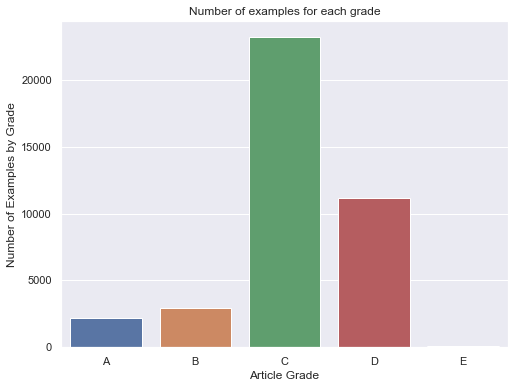

In [17]:
# Number of examples in each class
sns.set(rc={'figure.figsize': (8, 6)})
ax = sns.countplot(data['grade'], order=['A', 'B', 'C', 'D', 'E'])
ax.set(xlabel='Article Grade', ylabel='Number of Examples by Grade')
plt.title('Number of examples for each grade')
plt.show()

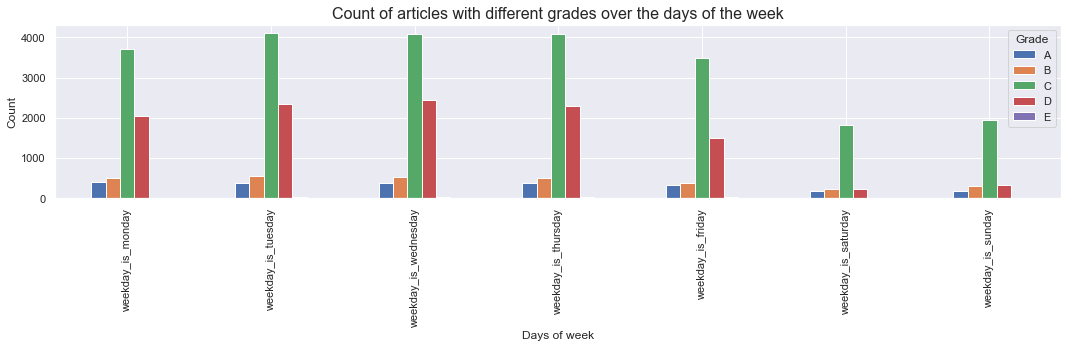

In [18]:
# Visualize the count of articles with different grades over the days of the week
grade_counts_by_day = data.groupby('grade')[data.columns[31:38]].sum().T

fig, ax = plt.subplots(figsize=(15, 5))
grade_counts_by_day.plot(kind='bar', ax=ax)

plt.title("Count of articles with different grades over the days of the week", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Days of week", fontsize=12)
plt.legend(title='Grade')
plt.tight_layout()
plt.savefig("grades_days.pdf")
plt.show()
 

It seems that the popular articles are posted usually on the weekdays rather than the weekends. 

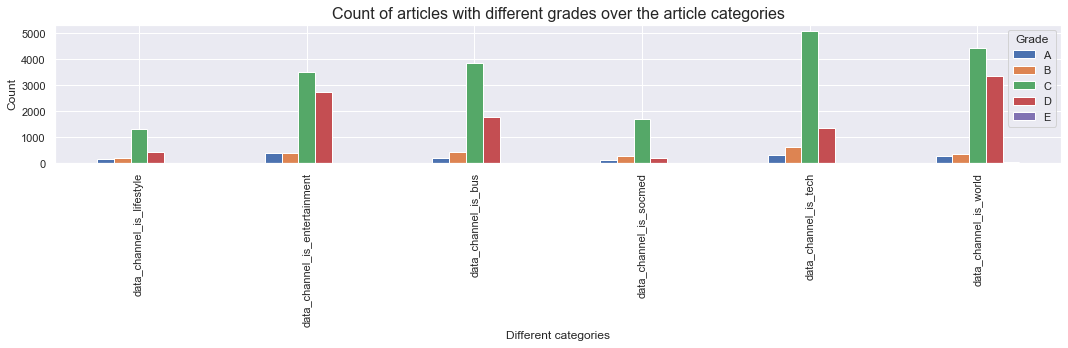

In [19]:
# Visualize the count of articles with different grades over the article categories
grade_counts_by_category = data.groupby('grade')[data.columns[13:19]].sum().T

fig, ax = plt.subplots(figsize=(15, 5))
grade_counts_by_category.plot(kind='bar', ax=ax)

plt.title("Count of articles with different grades over the article categories", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Different categories", fontsize=12)
plt.legend(title='Grade')
plt.tight_layout()
plt.savefig("grades_categories.pdf")
plt.show()

The above graph tells us that the Social media and Technology articles are more popular than other categories.

In [20]:
# n_tokens_content: Number of words in the content 
# Checking for rows that contain 0 for n_tokens_content
num_of_nowords= data[data['n_tokens_content']==0].index
print('number of news items with no words :', num_of_nowords.size)

number of news items with no words : 1181


In [21]:
# Dropping examples with no words in the content
data = data[data['n_tokens_content'] != 0]

In [22]:
# n_tokens_title: Number of words in the title
# Checking for rows that contain 0 for n_tokens_title
num_of_nowords_title= data[data['n_tokens_title']==0].index
print('number of news items with no words', num_of_nowords_title.size)

number of news items with no words 0


In [23]:
#n_non_stop_words: Rate of non-stop words in the content
#Exploring the n_non_stop_words which is the Rate of non-stop words in the content
data['n_non_stop_words'].describe()

count    38463.000000
mean         1.027065
std          5.307978
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64

There is just one record where the value of this column is 1042. All other instances have values between 0 and 1, so this clearly is an outlier and needs to be removed.

In [24]:
data = data[data['n_non_stop_words'] != 1042]

<AxesSubplot:xlabel='grade', ylabel='n_non_stop_words'>

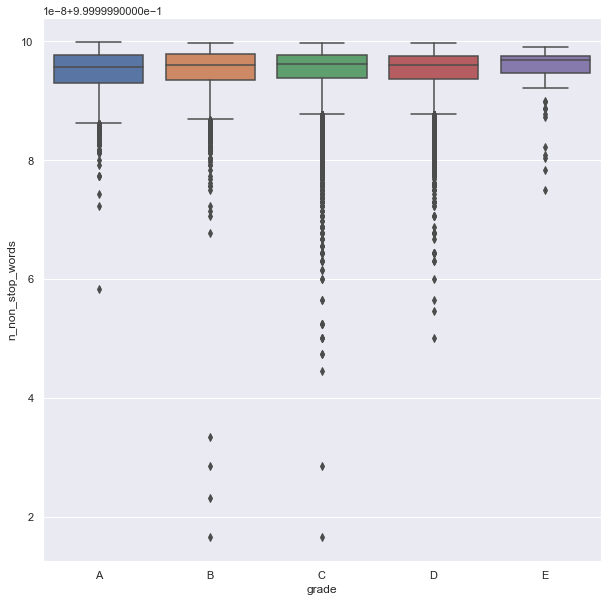

In [25]:
# Boxplot for the n_non_stop_words and grade
fig, axes = plt.subplots(figsize=(10,10))
sns.boxplot(x='grade', y='n_non_stop_words', data=data, ax=axes, order=['A', 'B', 'C', 'D', 'E'])


Most of the data are between 8 and 10 for all the five classes and don't really offer any uniqueness and so can be removed.

In [26]:
#n_non_stop_unique_tokens: Rate of unique non-stop words in the content
#Exploring n_non_stop_unique_tokens
data['n_non_stop_unique_tokens'].describe()

count    38462.000000
mean         0.693455
std          0.100644
min          0.119134
25%          0.632588
50%          0.693727
75%          0.756944
max          1.000000
Name: n_non_stop_unique_tokens, dtype: float64

<AxesSubplot:xlabel='grade', ylabel='n_non_stop_unique_tokens'>

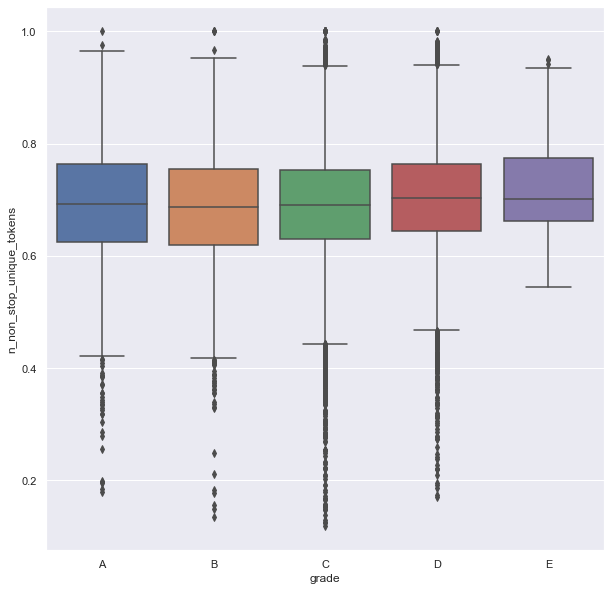

In [27]:
# Boxplot for the n_non_stop_unique_tokens and grade
fig, axes = plt.subplots(figsize=(10,10))
sns.boxplot(x='grade', y='n_non_stop_unique_tokens', data=data, ax=axes, order=['A', 'B', 'C', 'D', 'E'])

Most of the data are between 0.6 and 0.8 for all the five classes, so they don't really offer any uniqueness and so can be removed.

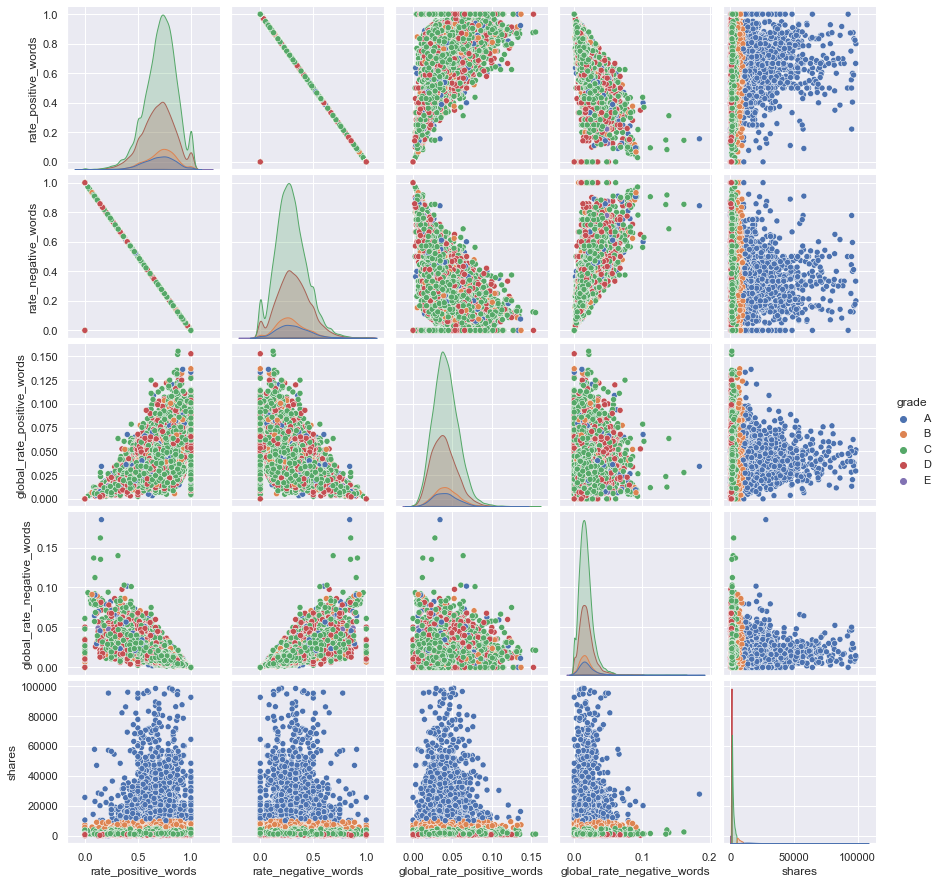

In [28]:
# Finding relationship between 'rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', and 'shares'
temp_data = data[data['shares'] <= 100000]
# running a pair plot for these terms
kw_cols = ['rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', 'shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='grade', diag_kind='kde', hue_order=['A', 'B', 'C', 'D', 'E'])


There is a linear relationship between rate_positive_words and rate_negative_words but no special relationship with the target variable.

global_rate_positive_words and global_rate_negative_words show slight relationship with shares.

<AxesSubplot:xlabel='n_tokens_content', ylabel='shares'>

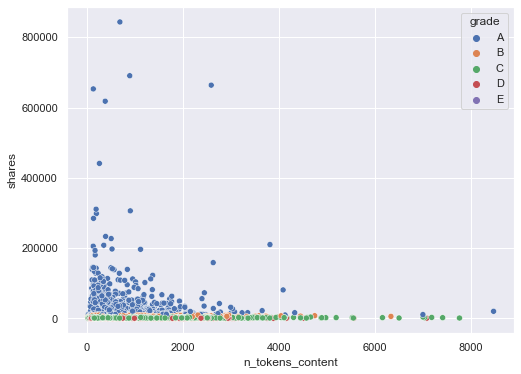

In [29]:
# n_tokens_content
sns.scatterplot(x='n_tokens_content', y='shares', hue='grade', data=data, hue_order=['A', 'B', 'C', 'D', 'E'])

<AxesSubplot:xlabel='n_tokens_title', ylabel='shares'>

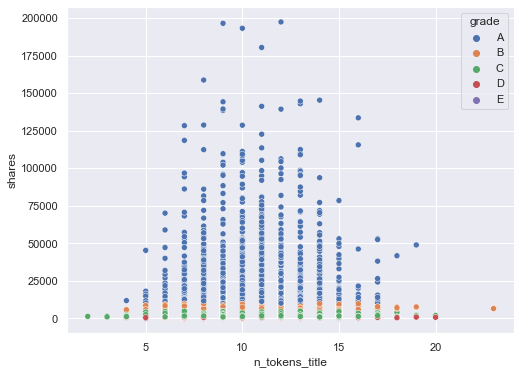

In [30]:
# n_tokens_title
temp_data = data[data['shares'] <= 200000]
sns.scatterplot(x='n_tokens_title', y='shares', hue='grade', data=temp_data, hue_order=['A', 'B', 'C', 'D', 'E'])

##### From the above scatterplot, it can be seen than good articles will generally tend to have n_tokens_title between 5 and 18 words

/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


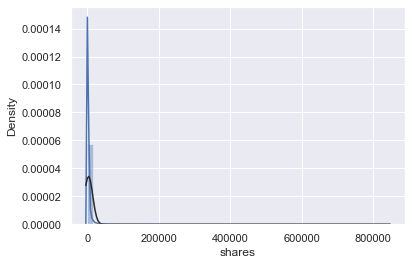

In [31]:
# Exploring the target variable
# histogram and normal probability plot
temp_data = data[data['shares'] <= 100000]
fig, ax = plt.subplots(figsize=(6, 4))
sns.distplot(data['shares'], fit=norm)
plt.show()

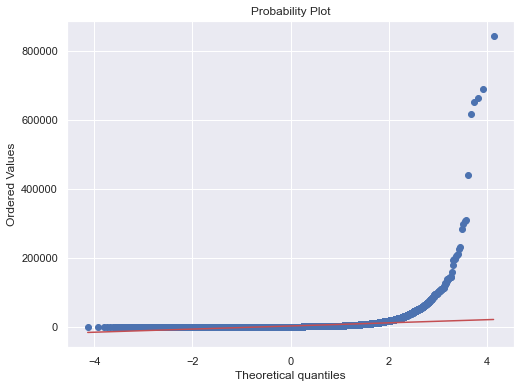

In [32]:
fig = plt.figure()
res = probplot(data['shares'], plot=plt)
plt.show()

From the above graphs, we can see that the target variable 'shares' doesn't have a normal distribution. It shows 'peakedness', positive skewness and does not follow the diagonal line. We can do log transfromation to make it a normal distribution.

/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


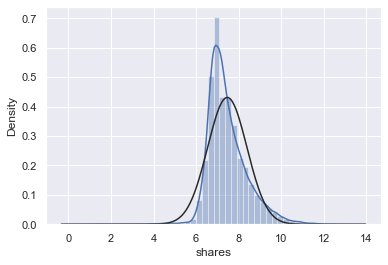

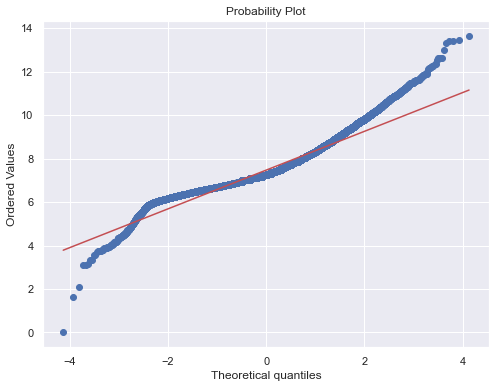

In [33]:
# Applying log transformation

# making a copy of the data
new_shares_data = copy(data)

# log transformation
new_shares_data.loc[new_shares_data['shares'] > 0, 'shares'] = np.log(data.loc[data['shares'] > 0, 'shares'])
new_shares_log = new_shares_data['shares']

#transformed histogram and normal probability plot
fig,ax = plt.subplots(figsize=(6,4))
sns.distplot(new_shares_log, fit=norm);
fig = plt.figure()
res = probplot(new_shares_log, plot=plt)

Now the shares column have a normal distribution and it also follows the diagonal line.

In [34]:
# Removing non-predictive columns (url and timedelta)and other columns from our above analysis
new_shares_data = new_shares_data.drop(labels=['url', 'timedelta', 'n_non_stop_unique_tokens', 'n_non_stop_words'], axis = 1)
new_shares_data.head(n=4)

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,grade
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,6.385194,D
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,6.566672,D
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,7.313220,C
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,7.090077,C


In [35]:
#dataframe with numerical features
data_num_cols = new_shares_data.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world", "grade"],axis=1)

#dataframe contains catagorical features.
data_cat_cols = new_shares_data[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world", "grade"]]

In [36]:
# Drop target variable 
data_num_cols = data_num_cols.drop('shares',axis=1)

In [37]:
# Note: log transformation can only be performed on data without zero values
for col in data_num_cols.columns:
    # applying log transformation
    temp = data_num_cols[data_num_cols[col] == 0]
    # only apply to non-zero features
    if temp.shape[0] == 0:
        data_num_cols[col] = np.log(data_num_cols[col])
        print(col)
    else:
        # attempt to only transform the positive values alone
        data_num_cols.loc[data_num_cols[col] > 0, col] = np.log(data_num_cols.loc[data_num_cols[col] > 0, col])

n_tokens_title
n_tokens_content
n_unique_tokens
average_token_length
num_keywords
LDA_00
LDA_01
LDA_02
LDA_03
LDA_04


In [38]:
data_num_cols.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,2.484907,5.389072,-0.410084,1.386294,0.693147,0.000000,0.0,1.543376,1.609438,0.0,...,-0.971179,-2.302585,-0.356675,-0.350000,-0.600,-0.200000,-0.693147,-0.18750,0.000000,-1.673976
1,2.197225,5.541264,-0.502952,1.098612,0.000000,0.000000,0.0,1.592032,1.386294,0.0,...,-1.248571,-3.401197,-0.356675,-0.118750,-0.125,-0.100000,0.000000,0.00000,-0.693147,0.000000
2,2.197225,5.351858,-0.553160,1.098612,0.000000,0.000000,0.0,1.480095,1.791759,0.0,...,-0.701515,-2.302585,0.000000,-0.466667,-0.800,-0.133333,0.000000,0.00000,-0.693147,0.000000
3,2.197225,6.274762,-0.685600,2.197225,0.000000,0.000000,0.0,1.482717,1.945910,0.0,...,-0.952008,-1.992430,-0.223144,-0.369697,-0.600,-0.166667,0.000000,0.00000,-0.693147,0.000000
4,2.564949,6.977281,-0.877922,2.944439,2.944439,2.995732,0.0,1.543904,1.945910,0.0,...,-0.888852,-3.401197,0.000000,-0.220192,-0.500,-0.050000,-0.788457,-1.99243,-3.091042,-1.992430


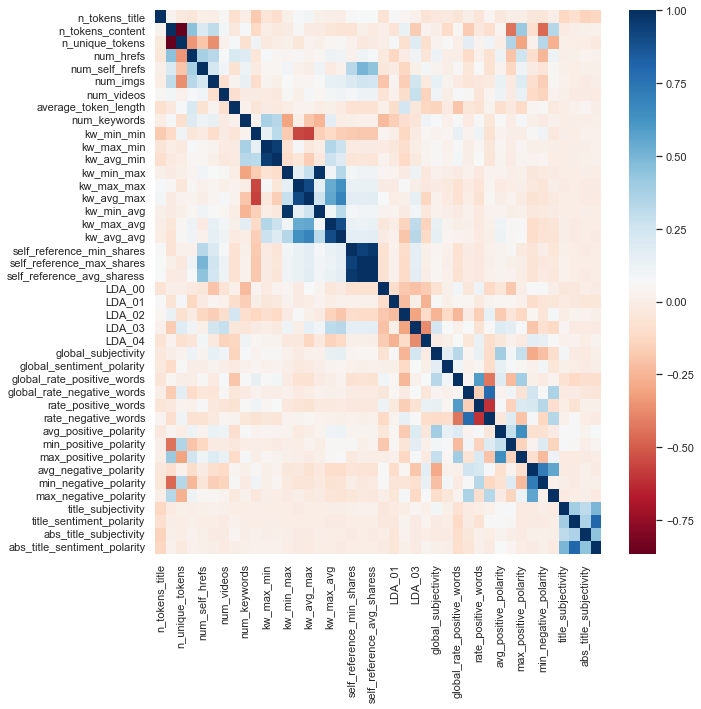

<Figure size 576x432 with 0 Axes>

In [39]:
# Checking for correlations
corr = data_num_cols.corr()
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap="RdBu")
fig = plt.figure()

In [40]:
data_num_cols.drop(['self_reference_avg_sharess'], axis=1, inplace=True)
data_num_cols.drop(['avg_negative_polarity'], axis=1, inplace=True)
data_num_cols.drop(['avg_positive_polarity'], axis=1, inplace=True)
data_num_cols.drop(['kw_avg_min'], axis=1, inplace=True)

In [41]:
data_num_cols.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'min_positive_polarity', 'max_positive_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [42]:
data_num_cols.shape

(38462, 38)

In [43]:
type(data_num_cols)

pandas.core.frame.DataFrame

For Categorical column analysis, we have done the Chi-square test.

In [44]:
# Chi square test for the categorical variables
def get_chi_sq(row, column, df):  

    # plot the graph for the data passed
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sns.countplot(data=df, x=row, hue=column)  
    plt.xlabel(row)
    plt.ylabel('Count')
    plt.show()
    # doing this to keep from opening too many figs at once (eats memory)
    plt.close(fig);
      
    # create cross-tabulation
    xtab = pd.crosstab(df[row], df[column], margins = False)   
    print('observed data:\n', xtab)
    
    # Chi-square contingency table
    chi2, p_value, dof, expected = chi2_contingency(xtab, correction = False)
    print('expected data:\n', expected)
    print('chi-squared value: {:.4f} for {:.0f} dof; p-value = {:.4f}\n'.format(chi2, dof, p_value))
    
    return

In [45]:
data_cat_cols.columns

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'grade'],
      dtype='object')

In [46]:
data_normal = pd.concat([data_num_cols,data_cat_cols],axis=1)

In [47]:
data_normal.shape

(38462, 53)

In [48]:
data_normal['grade'].unique()

array(['D', 'C', 'A', 'B', 'E'], dtype=object)

In [49]:
data_normal.shape

(38462, 53)

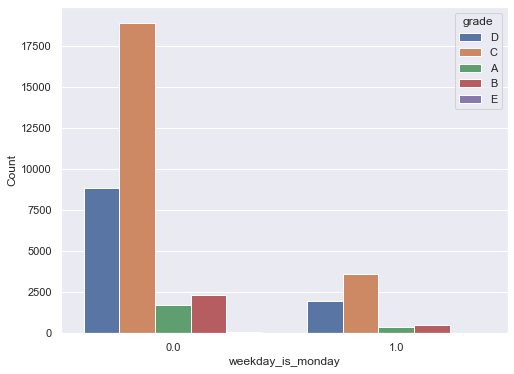

observed data:
 grade                 A     B      C     D   E
weekday_is_monday                             
0.0                1728  2361  18949  8876  77
1.0                 379   478   3614  1992   8
expected data:
 [[1.75250993e+03 2.36135534e+03 1.87669111e+04 9.03952441e+03
  7.06992616e+01]
 [3.54490068e+02 4.77644662e+02 3.79608894e+03 1.82847559e+03
  1.43007384e+01]]
chi-squared value: 33.4589 for 4 dof; p-value = 0.0000



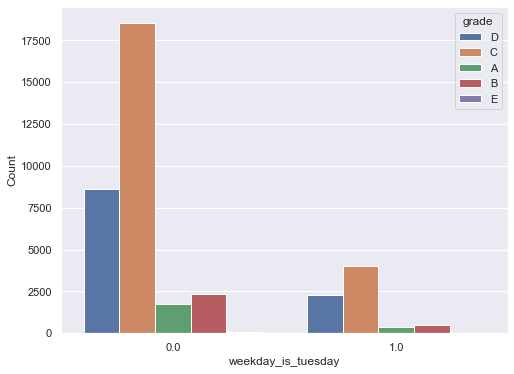

observed data:
 grade                  A     B      C     D   E
weekday_is_tuesday                             
0.0                 1739  2327  18565  8593  68
1.0                  368   512   3998  2275  17
expected data:
 [[1.71421777e+03 2.30975997e+03 1.83568560e+04 8.84201175e+03
  6.91544901e+01]
 [3.92782227e+02 5.29240029e+02 4.20614399e+03 2.02598825e+03
  1.58455099e+01]]
chi-squared value: 52.9943 for 4 dof; p-value = 0.0000



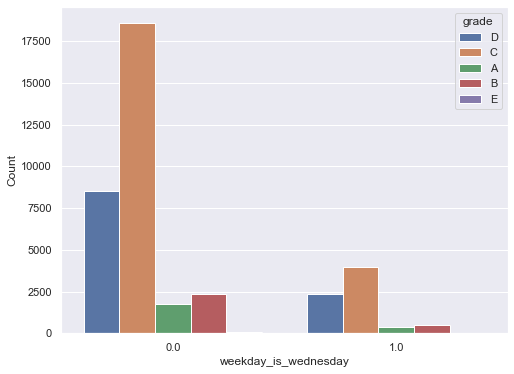

observed data:
 grade                    A     B      C     D   E
weekday_is_wednesday                             
0.0                   1742  2351  18600  8495  69
1.0                    365   488   3963  2373  16
expected data:
 [[1.71230043e+03 2.30717651e+03 1.83363239e+04 8.83212199e+03
  6.90771411e+01]
 [3.94699574e+02 5.31823488e+02 4.22667607e+03 2.03587801e+03
  1.59228589e+01]]
chi-squared value: 96.1268 for 4 dof; p-value = 0.0000



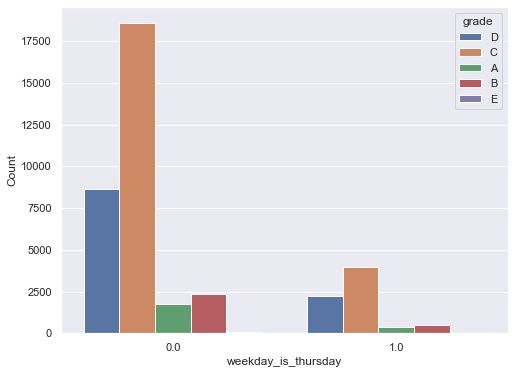

observed data:
 grade                   A     B      C     D   E
weekday_is_thursday                             
0.0                  1752  2353  18607  8631  67
1.0                   355   486   3956  2237  18
expected data:
 [[1.72068197e+03 2.31846992e+03 1.84260785e+04 8.87535438e+03
  6.94152670e+01]
 [3.86318028e+02 5.20530082e+02 4.13692153e+03 1.99264562e+03
  1.55847330e+01]]
chi-squared value: 52.7531 for 4 dof; p-value = 0.0000



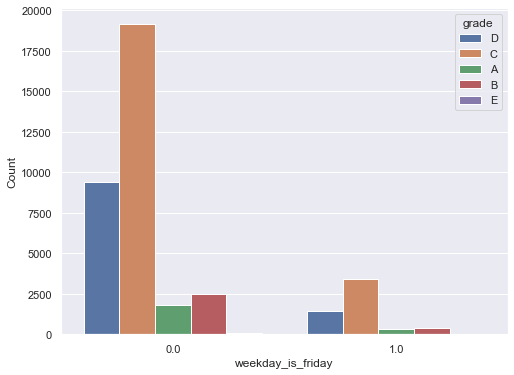

observed data:
 grade                 A     B      C     D   E
weekday_is_friday                             
0.0                1800  2465  19172  9416  71
1.0                 307   374   3391  1452  14
expected data:
 [[1.80362092e+03 2.43022297e+03 1.93142377e+04 9.30315719e+03
  7.27611669e+01]
 [3.03379075e+02 4.08777027e+02 3.24876226e+03 1.56484281e+03
  1.22388331e+01]]
chi-squared value: 20.5838 for 4 dof; p-value = 0.0004



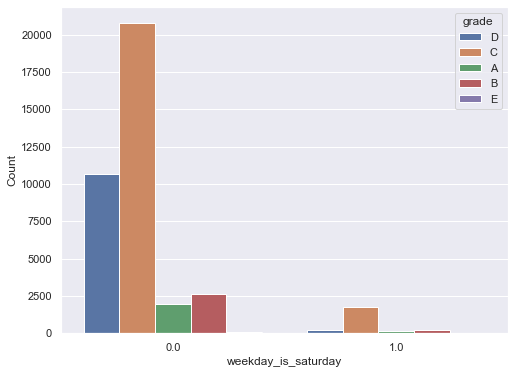

observed data:
 grade                   A     B      C      D   E
weekday_is_saturday                              
0.0                  1950  2620  20800  10648  75
1.0                   157   219   1763    220  10
expected data:
 [[1.97722300e+03 2.66413673e+03 2.11732713e+04 1.01986044e+04
  7.97645728e+01]
 [1.29777001e+02 1.74863268e+02 1.38972875e+03 6.69395559e+02
  5.23542717e+00]]
chi-squared value: 450.9181 for 4 dof; p-value = 0.0000



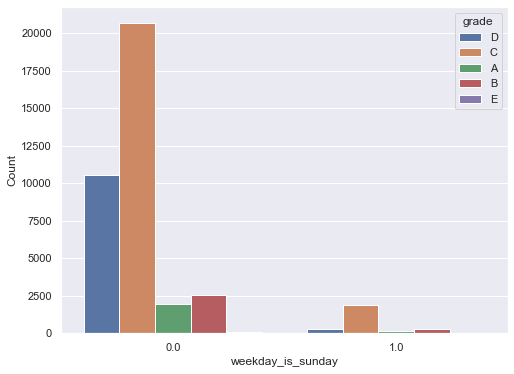

observed data:
 grade                 A     B      C      D   E
weekday_is_sunday                              
0.0                1931  2557  20685  10549  83
1.0                 176   282   1878    319   2
expected data:
 [[1.96144597e+03 2.64287856e+03 2.10043215e+04 1.01172258e+04
  7.91281005e+01]
 [1.45554027e+02 1.96121445e+02 1.55867846e+03 7.50774167e+02
  5.87189954e+00]]
chi-squared value: 386.9945 for 4 dof; p-value = 0.0000



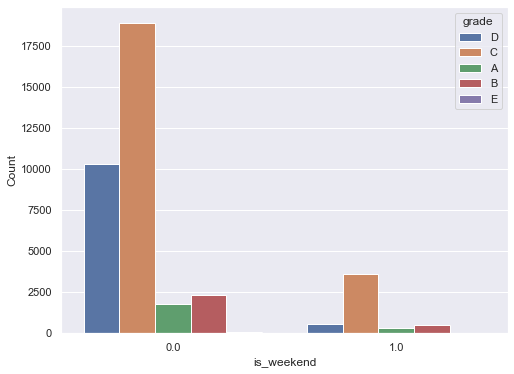

observed data:
 grade          A     B      C      D   E
is_weekend                              
0.0         1774  2338  18922  10329  73
1.0          333   501   3641    539  12
expected data:
 [[1.83166897e+03 2.46801529e+03 1.96145928e+04 9.44783027e+03
  7.38926733e+01]
 [2.75331028e+02 3.70984712e+02 2.94840721e+03 1.42016973e+03
  1.11073267e+01]]
chi-squared value: 882.4614 for 4 dof; p-value = 0.0000



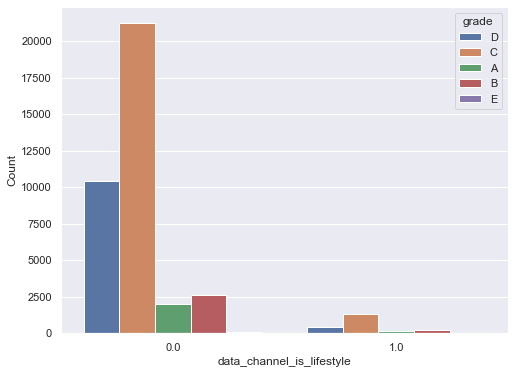

observed data:
 grade                         A     B      C      D   E
data_channel_is_lifestyle                              
0.0                        1969  2635  21262  10438  81
1.0                         138   204   1301    430   4
expected data:
 [[1.99321915e+03 2.68569016e+03 2.13445675e+04 1.02811133e+04
  8.04098851e+01]
 [1.13780849e+02 1.53309838e+02 1.21843250e+03 5.86886693e+02
  4.59011492e+00]]
chi-squared value: 73.4942 for 4 dof; p-value = 0.0000



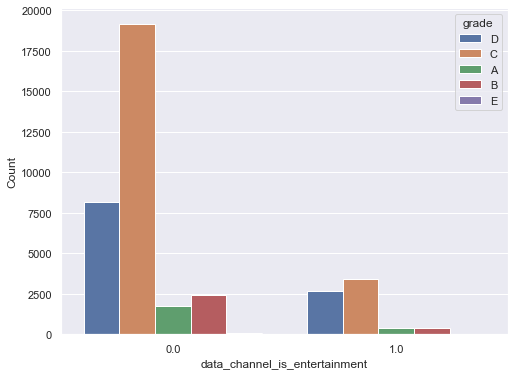

observed data:
 grade                             A     B      C     D   E
data_channel_is_entertainment                             
0.0                            1727  2450  19171  8192  67
1.0                             380   389   3392  2676  18
expected data:
 [[1.73147390e+03 2.33301110e+03 1.85416448e+04 8.93101960e+03
  6.98506318e+01]
 [3.75526104e+02 5.05988898e+02 4.02135523e+03 1.93698040e+03
  1.51493682e+01]]
chi-squared value: 496.6026 for 4 dof; p-value = 0.0000



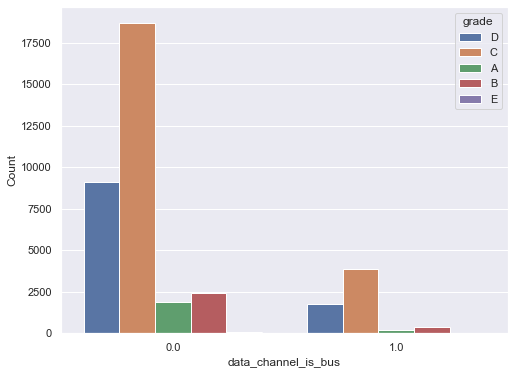

observed data:
 grade                   A     B      C     D   E
data_channel_is_bus                             
0.0                  1910  2434  18711  9095  77
1.0                   197   405   3852  1773   8
expected data:
 [[1.76543833e+03 2.37877523e+03 1.89053560e+04 9.10620966e+03
  7.12208154e+01]
 [3.41561671e+02 4.60224767e+02 3.65764404e+03 1.76179034e+03
  1.37791846e+01]]
chi-squared value: 96.2335 for 4 dof; p-value = 0.0000



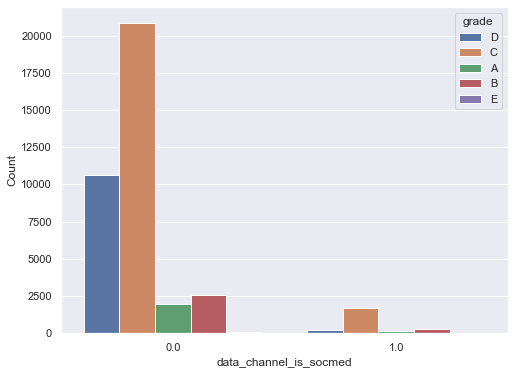

observed data:
 grade                      A     B      C      D   E
data_channel_is_socmed                              
0.0                     1974  2574  20864  10659  80
1.0                      133   265   1699    209   5
expected data:
 [[1.98040032e+03 2.66841789e+03 2.12072959e+04 1.02149932e+04
  7.98927513e+01]
 [1.26599683e+02 1.70582107e+02 1.35570415e+03 6.53006812e+02
  5.10724871e+00]]
chi-squared value: 469.6340 for 4 dof; p-value = 0.0000



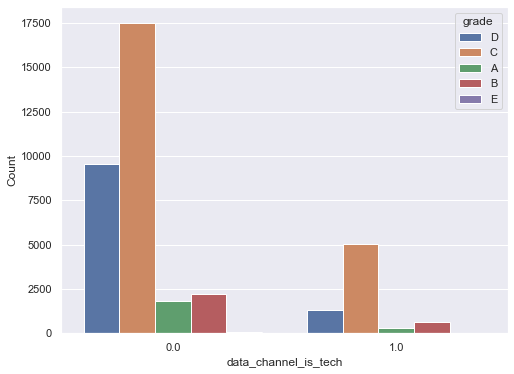

observed data:
 grade                    A     B      C     D   E
data_channel_is_tech                             
0.0                   1797  2210  17514  9536  80
1.0                    310   629   5049  1332   5
expected data:
 [[1.70572667e+03 2.29831894e+03 1.82659282e+04 8.79821424e+03
  6.88119443e+01]
 [4.01273335e+02 5.40681062e+02 4.29707179e+03 2.06978576e+03
  1.61880557e+01]]
chi-squared value: 540.4032 for 4 dof; p-value = 0.0000



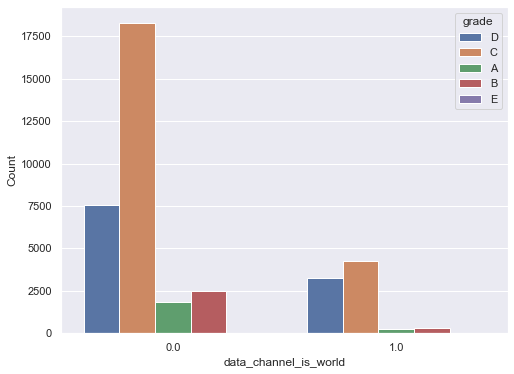

observed data:
 grade                     A     B      C     D   E
data_channel_is_world                             
0.0                    1865  2506  18297  7582  44
1.0                     242   333   4266  3286  41
expected data:
 [[ 1659.54599345  2236.09448287 17771.39831522  8560.01227185
     66.94893661]
 [  447.45400655   602.90551713  4791.60168478  2307.98772815
     18.05106339]]
chi-squared value: 909.5977 for 4 dof; p-value = 0.0000



In [50]:
# listing all categorical variables
cat_cols = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']

# for every category column, doing the Chi-sq test
for cat_var in cat_cols:
  get_chi_sq(cat_var, 'grade', data_normal)


In [51]:
# We are dropping the weekday is saturday and sunday columns since they are same as is_weekend column
data_normal.drop(['weekday_is_saturday'], axis=1, inplace=True)
data_normal.drop(['weekday_is_sunday'], axis=1, inplace=True)

In [52]:
data_normal.shape

(38462, 51)

In [53]:
data_normal.isnull().values.any()

False

In [54]:
# Splitting the dataset 70% training and 30% test

X = data_normal.drop(['grade'], axis=1)
y = data_normal['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [55]:
X_train.shape

(26923, 50)

In [56]:
X_test.shape

(11539, 50)

In [57]:
X_train.reset_index(drop=True)

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,2.079442,6.749931,-0.713867,3.044522,1.098612,0.000000,0.000000,1.504077,2.302585,-1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.302585,6.458338,-0.830070,2.079442,1.386294,2.564949,0.000000,1.486508,2.079442,1.386294,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.079442,3.891820,-0.202941,1.098612,1.098612,0.000000,0.693147,1.474156,1.609438,-1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.484907,5.988961,-0.654532,2.639057,0.693147,0.000000,0.000000,1.574239,2.079442,-1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.397895,5.973810,-0.557709,1.609438,1.386294,0.000000,0.000000,1.544255,2.302585,1.386294,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26918,2.397895,7.003974,-0.840038,2.708050,0.000000,0.000000,0.000000,1.571111,2.302585,1.386294,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26919,2.484907,5.662960,-0.528525,1.609438,0.693147,0.000000,0.000000,1.477493,1.791759,5.379897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26920,2.302585,5.940171,-0.621688,0.693147,0.000000,0.000000,0.000000,1.550358,1.386294,1.386294,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26921,2.197225,5.043425,-0.471347,1.098612,0.000000,0.000000,0.000000,1.589893,1.945910,1.386294,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
X_test.reset_index(drop=True)

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,2.397895,7.413970,-1.070749,2.639057,1.791759,0.000000,0.000000,1.487669,2.197225,1.386294,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.484907,6.315358,-0.652398,1.098612,0.693147,0.000000,0.000000,1.530841,1.609438,1.386294,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.197225,6.230481,-0.585764,1.791759,0.693147,0.000000,0.000000,1.514521,2.302585,1.386294,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.302585,4.969813,-0.346523,1.386294,1.098612,0.000000,0.000000,1.461518,2.197225,5.379897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.302585,6.609349,-0.804132,2.197225,1.098612,0.000000,1.386294,1.456230,2.302585,-1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11534,2.564949,6.650279,-0.699792,2.772589,0.000000,0.693147,0.693147,1.588258,1.609438,-1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11535,2.564949,7.410952,-0.813712,3.784190,2.995732,1.609438,2.079442,1.533859,2.079442,-1.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11536,2.302585,5.056246,-0.386047,1.386294,1.386294,0.000000,0.000000,1.558480,1.609438,1.386294,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11537,2.197225,5.438079,-0.434517,1.945910,0.000000,0.693147,0.000000,1.619819,1.945910,-1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [59]:
y_train.reset_index(drop=True)

0        C
1        C
2        C
3        D
4        C
        ..
26918    B
26919    D
26920    D
26921    B
26922    C
Name: grade, Length: 26923, dtype: object

In [60]:
y_test.reset_index(drop=True)

0        A
1        B
2        C
3        C
4        C
        ..
11534    C
11535    D
11536    C
11537    C
11538    C
Name: grade, Length: 11539, dtype: object

## Models

*   Baseline Model - Naive Bayes
*   Logistic Regression




In [61]:
from sklearn.metrics import classification_report, plot_confusion_matrix

def model_results(model, sample_size, X_train, y_train, X_test, y_test):
    output = {}
    model.fit(X_train[:sample_size], y_train[:sample_size])

    # Get predictions
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train[:sample_size])

    # Accuracy on the training samples
    output['acc_train'] = accuracy_score(y_train[:sample_size], predictions_train)

    # Accuracy on test set
    output['acc_test'] = accuracy_score(y_test, predictions_test)

    # Classification report
    class_report = classification_report(y_test, predictions_test, output_dict=True)
    output['classification_report'] = class_report

    print("{} trained on {} samples.".format(model.__class__.__name__, sample_size))
    print("{} with test accuracy: {}".format(model.__class__.__name__, output['acc_test']))
    print("\nClassification Report:")
    print(classification_report(y_test, predictions_test))

    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(7, 5))
    plot_confusion_matrix(model, X_test, y_test, ax=ax)
    plt.show()

    return output


In [62]:
# Dividing the training data into validation and train datasets
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

C : float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [63]:
#cross validation
results= pd.DataFrame()
c_range = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ,0.8, 0.9, 1.0]
for i, c in enumerate(c_range):
    model = LogisticRegression(random_state=100, C=c, multi_class='ovr')
    model.fit(X_train_val, y_train_val)
    # Get predictions on the validation samples
    predicted_labels = model.predict(X_test_val)
    predicted_prob = model.predict_proba(X_test_val)
    
    results.at[i, 'C_value'] = float(c)
    results.at[i, 'accuracy'] = accuracy_score(y_test_val, predicted_labels)
    results.at[i, 'auc_test'] = roc_auc_score(y_test_val, predicted_prob, multi_class='ovr')
    results.at[i, 'f_test'] = fbeta_score(y_test_val, predicted_labels, beta=1, average='weighted')


/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [64]:
results

,C_value,accuracy,auc_test,f_test
0,0.001,0.592547,0.694029,0.467972
1,0.010,0.601090,0.711998,0.512074
2,0.100,0.601461,0.717969,0.524792
3,0.200,0.600966,0.718689,0.522327
4,0.300,0.602080,0.718942,0.527012
5,0.400,0.602328,0.718772,0.528206
6,0.500,0.600966,0.718502,0.524684
7,0.600,0.602204,0.718629,0.526934
8,0.700,0.602328,0.718807,0.525458
9,0.800,0.601090,0.718504,0.525141


/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

GaussianNB trained on 269 samples.
GaussianNB with test accuracy: 0.18329144639916803

Classification Report:
              precision    recall  f1-score   support

           A       0.06      0.51      0.10       637
           B       0.08      0.27      0.12       859
           C       0.66      0.13      0.22      6804
           D       0.40      0.20      0.27      3222
           E       0.00      0.00      0.00        17

    accuracy                           0.18     11539
   macro avg       0.24      0.22      0.14     11539
weighted avg       0.51      0.18      0.22     11539



/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

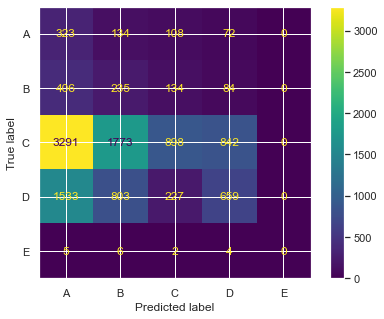

GaussianNB trained on 2692 samples.
GaussianNB with test accuracy: 0.3928416673888552

Classification Report:
              precision    recall  f1-score   support

           A       0.07      0.05      0.06       637
           B       0.11      0.24      0.15       859
           C       0.66      0.44      0.53      6804
           D       0.41      0.40      0.41      3222
           E       0.00      0.18      0.00        17

    accuracy                           0.39     11539
   macro avg       0.25      0.26      0.23     11539
weighted avg       0.52      0.39      0.44     11539



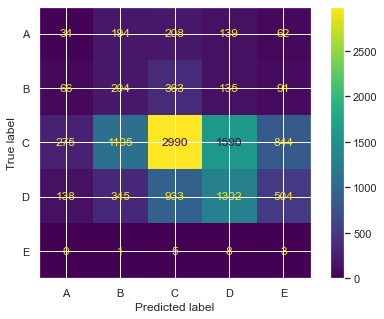

GaussianNB trained on 26923 samples.
GaussianNB with test accuracy: 0.4317531848513736

Classification Report:
              precision    recall  f1-score   support

           A       0.14      0.25      0.18       637
           B       0.11      0.12      0.12       859
           C       0.67      0.48      0.56      6804
           D       0.41      0.44      0.42      3222
           E       0.01      0.59      0.02        17

    accuracy                           0.43     11539
   macro avg       0.27      0.38      0.26     11539
weighted avg       0.53      0.43      0.47     11539



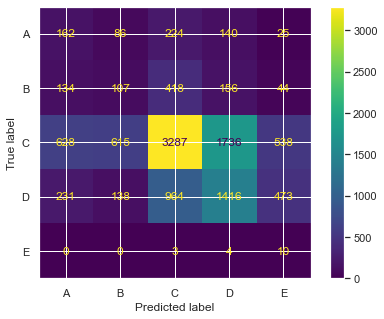

/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWar

LogisticRegression trained on 269 samples.
LogisticRegression with test accuracy: 0.5808128953982148

Classification Report:


/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.18      0.01      0.02       637
           B       0.00      0.00      0.00       859
           C       0.62      0.83      0.71      6804
           D       0.44      0.32      0.37      3222
           E       0.00      0.00      0.00        17

    accuracy                           0.58     11539
   macro avg       0.25      0.23      0.22     11539
weighted avg       0.50      0.58      0.52     11539



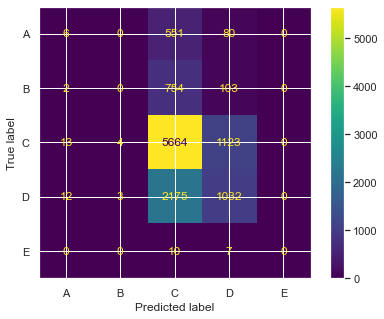

/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWar

LogisticRegression trained on 2692 samples.
LogisticRegression with test accuracy: 0.5984054077476384

Classification Report:


/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.00      0.00      0.00       637
           B       0.00      0.00      0.00       859
           C       0.62      0.87      0.72      6804
           D       0.49      0.30      0.38      3222
           E       0.00      0.00      0.00        17

    accuracy                           0.60     11539
   macro avg       0.22      0.24      0.22     11539
weighted avg       0.50      0.60      0.53     11539



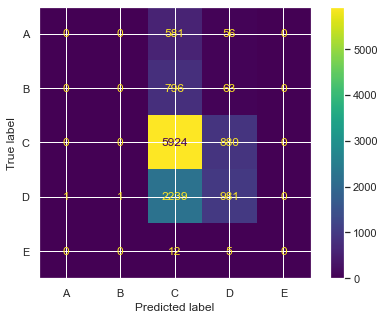

/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWar

LogisticRegression trained on 26923 samples.
LogisticRegression with test accuracy: 0.599272033971748

Classification Report:
              precision    recall  f1-score   support

           A       0.50      0.00      0.00       637
           B       0.00      0.00      0.00       859
           C       0.61      0.90      0.73      6804
           D       0.50      0.24      0.33      3222
           E       0.00      0.00      0.00        17

    accuracy                           0.60     11539
   macro avg       0.32      0.23      0.21     11539
weighted avg       0.53      0.60      0.52     11539



/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

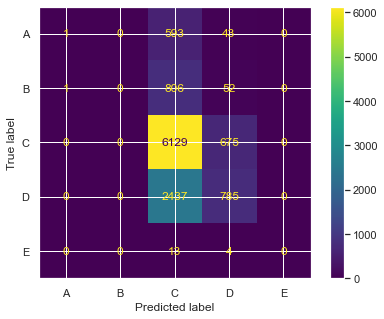

In [65]:
# Naive Bayes - Baseline Model
# Logistic Regression

# Model initialization
model_A = GaussianNB()
model_B = LogisticRegression(random_state=100, C=0.100, multi_class='multinomial', solver='lbfgs')

# Sampling the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Predict and results of different models
results = {}
for model in [model_A, model_B]:
    clf_name = model.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if model == model_A:
            results[clf_name][i] = \
            model_results(model, samples, X_train, y_train, X_test, y_test)
        elif model == model_B:
            results[clf_name][i] = \
            model_results(model, samples, X_train, y_train, X_test, y_test)
        else:
            results[clf_name][i] = \
            model_results(clf, samples, X_train, y_train, X_test, y_test)


/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

KNeighborsClassifier trained on 269 samples.
KNeighborsClassifier with test accuracy: 0.5606205043764624

Classification Report:


/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.00      0.00      0.00       637
           B       0.06      0.00      0.00       859
           C       0.60      0.87      0.71      6804
           D       0.35      0.17      0.23      3222
           E       0.00      0.00      0.00        17

    accuracy                           0.56     11539
   macro avg       0.20      0.21      0.19     11539
weighted avg       0.45      0.56      0.48     11539



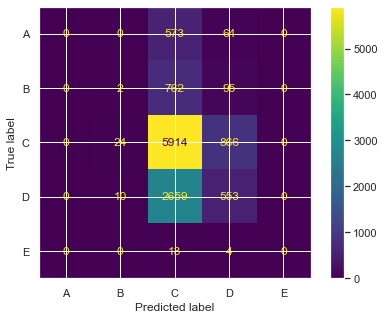

/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

KNeighborsClassifier trained on 2692 samples.
KNeighborsClassifier with test accuracy: 0.5664269000779963

Classification Report:


/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

              precision    recall  f1-score   support

           A       0.10      0.01      0.01       637
           B       0.11      0.01      0.02       859
           C       0.61      0.83      0.70      6804
           D       0.41      0.27      0.32      3222
           E       0.00      0.00      0.00        17

    accuracy                           0.57     11539
   macro avg       0.25      0.22      0.21     11539
weighted avg       0.49      0.57      0.51     11539



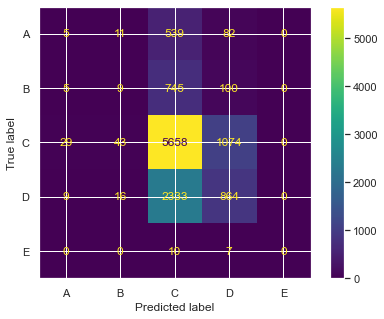

/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

KNeighborsClassifier trained on 26923 samples.
KNeighborsClassifier with test accuracy: 0.572753271513996

Classification Report:


/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raymondsutanto02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

              precision    recall  f1-score   support

           A       0.10      0.02      0.03       637
           B       0.14      0.02      0.04       859
           C       0.61      0.83      0.71      6804
           D       0.44      0.29      0.35      3222
           E       0.00      0.00      0.00        17

    accuracy                           0.57     11539
   macro avg       0.26      0.23      0.22     11539
weighted avg       0.50      0.57      0.52     11539



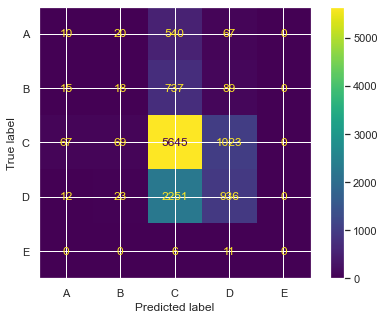

In [66]:
# KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=9)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
clf_name = knn_clf.__class__.__name__
results[clf_name] = {}
for i, samples in enumerate([samples_1, samples_10, samples_100]):
    results[clf_name][i] = model_results(knn_clf, samples, X_train, y_train, X_test, y_test)


## K Nearest Neighbour (KNN)

## Soft-Margin SVM Model

In [67]:
# Normalizing the features
def get_normalized_vec(x_train,x_test):
  norm_X_train = normalize(x_train, norm='l2', axis=1, copy=True, return_norm=False)
  norm_X_test = normalize(x_test, norm='l2', axis=1, copy=True, return_norm=False)
  return norm_X_train,norm_X_test

In [68]:
# Normalize the feature vectors
X_train_dense_norm, X_test_dense_norm = get_normalized_vec(X_train,X_test)

In [69]:
# Define the function for soft-margin linear classifiers
def smc_function(vx_train, vx_test, vy_train, vy_test, slack):
    model = svm.SVC(kernel='rbf', C=slack, decision_function_shape='ovr')
    model.fit(vx_train, vy_train)
    train_err = (1 - model.score(vx_train, vy_train))
    test_err = (1 - model.score(vx_test, vy_test))
    return train_err, test_err

In [70]:
def smc_cv(x_train, x_test, y_train, y_test):
    smc_train_err = {}
    smc_test_err = {}
    c = 0.0125
    while c < 12.8:
        smc_train, smc_test = smc_function(x_train, x_test, y_train, y_test, c)
        smc_train_err.update({c: smc_train})
        smc_test_err.update({c: smc_test})
        c = c + c
    return smc_train_err, smc_test_err

In [ ]:
smc_train_err, smc_test_err= smc_cv(X_train_dense_norm, X_test_dense_norm, y_train, y_test)

In [ ]:
# Picking the C value 
c_vals = np.array([0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4])
print("Training Errors:")
for c in c_vals:
    print('Train error at C =',c,':',smc_train_err[c])

print("Test Errors:")
for c in c_vals:
    print('Train error at C =',c,':',smc_test_err[c])


In [ ]:
# SVM RBF 
from sklearn.model_selection import cross_val_score

svmrbf = svm.SVC(kernel = 'rbf' , C=6.4, probability=True)
svmrbf.fit(X_train, y_train)

#cross validation accuracy
scores = cross_val_score(svmrbf, X_train, y_train, cv=5)
svm_rbf_trainacc = scores.mean()
svm_rbf_testacc = svmrbf.score(X_test, y_test)

svmrbf_y_test_Pred = svmrbf.predict(X_test)
svmrbf_F1_score = fbeta_score(y_test.values, svmrbf_y_test_Pred, beta=1)

print("--------SVM RBF kernel --------")
print("train accuracy is: ", svm_rbf_trainacc)
print("test accuracy is: ", svm_rbf_testacc)
print("F1 score is: ", svmrbf_F1_score)
confusion_matrix(y_test, svmrbf_y_test_Pred)

In [ ]:
svm_result['predictions'] = svmrbf_y_test_Pred.tolist()

In [ ]:
min_test = data[data['shares'] == min(data['shares'])]

In [ ]:
data[data['url'] == 'http://mashable.com/2014/12/10/mad-max-trailer/']

In [ ]:
max_test = data[data['shares'] == max(data['shares'])]

In [ ]:
svm_result.columns

In [ ]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'min_positive_polarity', 'max_positive_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']

In [ ]:
min_test = min_test[features]

In [ ]:
min_test.columns

In [ ]:
# get the prediction
print(svmrbf.predict(min_test))

In [ ]:
max_test = max_test[features]
max_test.columns

In [ ]:
print(svmrbf.predict(max_test))

In [ ]:
#Accuracy and AUC
test_accuracy = accuracy_score(y_test, svmrbf_y_test_Pred)
AUC_Test = roc_auc_score(y_test,svmrbf_y_test_Pred)
print("Accuracy : ", test_accuracy)   
print("AUC : ", AUC_Test)   

# Confusion Matrix
print("Confusion Matrix :")
print("\n")
cm = confusion_matrix(y_test, svmrbf_y_test_Pred)
data_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4) # for label size
sns.heatmap(data_cm, annot=True, annot_kws={"size": 14},fmt='g') # font size

In [ ]:
#AUC Curve
auc = metrics.roc_auc_score(y_test,svmrbf_y_test_Pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, svmrbf_y_test_Pred,pos_label = 1.0)
plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("AUC & ROC Curve", fontsize=12)
plt.plot(false_positive_rate, true_positive_rate, 'c')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='dimgrey')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)

plt.show()

In [ ]:
#PR curve

y_score = svmrbf.predict_proba(X_test)[:, 1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
# SVM poly kernel
from sklearn.model_selection import cross_val_score
svml = svm.SVC(kernel='poly',C=6.4,  max_iter=2000)
svml.fit(X_train, y_train)

#cross validation accuracy
scores = cross_val_score(svml, X_train, y_train, cv=5)
svml_trainacc = scores.mean()
svml_testacc = svml.score(X_test, y_test)

svml_y_test_Pred = svml.predict(X_test)
svml_F1_score = fbeta_score(y_test, svml_y_test_Pred, beta=1)

print("--------SVM poly kernel --------")
print("train accuracy is: ", svml_trainacc)
print("test accuracy is: ", svml_testacc)
print("F1 score is: ", svml_F1_score)

> **SVM**
*   Accuracy = 0.6662
*   AUC = 0.6630
*   F1 score = 0.6947


## Unsupervised Model

In [ ]:
data_normal.columns

In [ ]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'min_positive_polarity', 'max_positive_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']

data_normal_copy = data_normal.copy()
data_normal_copy.columns

In [ ]:
y = data_normal_copy.pop('grade')
X = data_normal_copy.loc[:, features]

In [ ]:
from sklearn.preprocessing import StandardScaler
# Fit and transform on datset
X_StandScaler = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_PCA = pca.fit_transform(X_StandScaler)

# Convert to dataframe
components = [f"PC{i+1}" for i in range(X_PCA.shape[1])]
X_PCA = pd.DataFrame(X_PCA, columns=components)

X_PCA.head()

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=components,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

In [ ]:
pca.get_covariance()

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

In [ ]:
print(f'Number of features: {len(features)}')

components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')



In [ ]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)



In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_StandScaler)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,30,1)
plt.xlabel('No. of components')
plt.ylabel('Cumulative explained variance')

let’s print out the top 4 features that contributes the most to each of the 6 components:

In [ ]:
print('Top 4 most important features in each component')
print('===============================================')

pca_components = abs(pca.components_)

for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {data_normal_copy.columns[indices].to_list()}')

Let’s now apply PCA to find the desired number of components based on the desired explained variance, say 85%:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(X_StandScaler)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance (%)")

In [ ]:
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = 0.85)
_model = LogisticRegression(random_state=100, C=1.0)
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

# train the model using the PCA components
log_regress_model.fit(X_train,y_train)


In [ ]:
#And let’s score the model to see how it performs:

log_regress_model.score(X_test,y_test)
##And we now have the following accuracy:
